# Introduction:

Cyclistic bikeshare analysis case study is part of Google Data Analytics Capstone - Complete a Case study project. It involves a bikeshare company's data of its customer's trip details. The data has been made available by Motivate International Inc. under this license.

# Objective:

The objective of this case study is to understand how casual riders and annual members use Cyclistic bikes differently as a junior data analyst based on few parameters obtained from existing data. From these insights, a new marketing strategy is to be designed to convert casual riders into annual members.
In order to answer the key business questions, the steps of the data analysis process: ask, prepare, process, analyze, share, and act is followed. The programming language used for analysis of the dataset is R.

# Data Source:

This data that has been made publicly available has been scrubbed to omit rider's personal information.
Cyclistic’s historical trip dataset is provided by Motivate International Inc. under the license. Motivate International Inc. (“Motivate”) operates the City of Chicago’s (“City”) Divvy bicycle sharing service. 


# Scenario:

Cyclistic is a fictional company launced in the year 2016. It provides bike-share services across a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Cyclistic provides flexibility in its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Lily Moreno is The director of marketing. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.

# Business task:

understand how casual riders and annual members use Cyclistic bikes differently. design marketing strategies aimed at converting casual riders into annual members. identify ways how digital media could affect marketing tactics.

# Key Stakeholders:

Lily Moreno: The director of marketing and the manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. Cyclistic executive team: The team in charge of approving the recommended marketing program.


In [1]:
#Load libraries

library(tidyverse)  #helps wrangle data
library(conflicted) # Use the conflicted package to manage conflicts


# Set dplyr::filter and dplyr::lag as the default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


# Step 1: collect data

In [2]:
#Uploading Divvy datasets (csv files)
q1_2019 <- read_csv("../input/cyclistic-bikeshare-dataset/Divvy_Trips_2019_Q1.csv")
q1_2020 <- read_csv("../input/cyclistic-bikeshare-dataset/Divvy_Trips_2020_Q1.csv")

Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): start_time, end_time, from_station_name, to_station_name, usertype,...
dbl (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num (1): tripduration

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ride_id, rideable_type, started_at, ended_at, start_station_name, e...
dbl (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, en...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE

In [3]:
#checking column names
colnames(q1_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
# Rename columns  to make them consistent with q1_2020
(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
                   ))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 0:16:06,2019-01-01 0:19:03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 0:18:41,2019-01-01 0:20:21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 0:18:43,2019-01-01 0:47:30,6205,1727,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


In [5]:
# Inspecting the dataframes and looking for incongruencies
str(q1_2019)
str(q1_2020)

spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : chr [1:365069] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:365069] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member

In [6]:
# Converting ride_id and rideable_type to character so that they can stack correctly
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

# Stacking individual quarter's data frames into one big data frame
all_trips <- bind_rows(q1_2019, q1_2020)

# Removing lat, long, birthyear, and gender fields as this data was dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

In [7]:
# checking the structure of the new dataframe
str(all_trips)

tibble [791,956 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscri

# STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [8]:
# Inspecting the new dataframe
colnames(all_trips)  #List of column names
nrow(all_trips)  #number of rows in data frame
dim(all_trips)  #Dimensions of the data frame
head(all_trips)  #first 6 rows of data frame
tail(all_trips)   #last 6 rows of data frame
str(all_trips)  #list of columns and data types 
summary(all_trips)  #Statistical summary of data

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 791956

[1] 791956      9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
6F4D221BDDFD943F,2020-03-10 10:40:27,2020-03-10 10:40:29,docked_bike,675,HQ QR,675,HQ QR,casual
ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,675,HQ QR,675,HQ QR,casual
82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240,Sheridan Rd & Irving Park Rd,member
AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210,Ashland Ave & Division St,casual
3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264,Stetson Ave & South Water St,member
064EC7698E4FF9B3,2020-03-08 13:03:57,2020-03-08 13:32:27,docked_bike,110,Dearborn St & Erie St,85,Michigan Ave & Oak St,casual


tibble [791,956 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscri

   ride_id           started_at          ended_at         rideable_type     
 Length:791956      Length:791956      Length:791956      Length:791956     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_id start_station_name end_station_id  end_station_name  
 Min.   :  2.0    Length:791956      Min.   :  2.0   Length:791956     
 1st Qu.: 77.0    Class :character   1st Qu.: 77.0   Class :character  
 Median :174.0    Mode  :character   Median :174.0   Mode  :character  
 Mean   :204.4                       Mean   :204.4                     
 3rd Qu.:291.0          

There are a few problems we need to fix: 
1. In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels. 
2. The data can only be aggregated at the ride-level, adding additional columns on day, month, year which will provide additional opportunities to aggregate the data. 
3. We need to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency. 
4. There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control

In [9]:
# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual" for consistency
# Checking how many observations fall under each usertype
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480      23163     378407     341906 

In [10]:
# Reassigning to desired values 
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

In [11]:
# Checking to make sure the proper number of observations were reassigned
table(all_trips$member_casual)


casual member 
 71643 720313 

In [12]:
# Adding columns that list the date, month, day, and year of each ride

all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

In [13]:
# Inspecting the structure of the columns
str(all_trips)

tibble [791,956 × 14] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ dat

In [14]:
# Adding column "ride_length" calculation to all_trips (in seconds)

all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In [15]:
# Inspecting the structure of the columns
str(all_trips)

tibble [791,956 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ dat

In [16]:
# Converting "ride_length" from Factor to numeric to run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

In [17]:
#checking for negative values 

negative_columns <- sapply(all_trips, function(col) any(col < 0))
negative_columns     

ride_id         started_at           ended_at      rideable_type 
             FALSE              FALSE              FALSE              FALSE 
  start_station_id start_station_name     end_station_id   end_station_name 
             FALSE              FALSE                 NA                 NA 
     member_casual               date              month                day 
             FALSE              FALSE              FALSE              FALSE 
              year        day_of_week        ride_length 
             FALSE              FALSE               TRUE

In [18]:
# Removing "bad" data by creating a new version of the dataframe (v2) since data is being removed

all_trips_v2 <- all_trips[!( all_trips$ride_length<0),]

In [19]:
#checking for negative values

negative_columns2 <- sapply(all_trips_v2, function(col) any(col < 0))
negative_columns2

ride_id         started_at           ended_at      rideable_type 
             FALSE              FALSE              FALSE              FALSE 
  start_station_id start_station_name     end_station_id   end_station_name 
             FALSE              FALSE              FALSE              FALSE 
     member_casual               date              month                day 
             FALSE              FALSE              FALSE              FALSE 
              year        day_of_week        ride_length 
             FALSE              FALSE              FALSE

In [20]:
#check for unique ride id
chck <- all_trips_v2 %>%
  count(ride_id) %>%
  filter(n > 1)

chck  #if 0 rows, all ride id is unique

ride_id,n
<chr>,<int>


# STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

In [21]:
#Descriptive analysis on ride_length (all figures in seconds)

summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0      328      537     1184      910 10632022 

In [22]:
# Comparing members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5098.8496
member,795.2513


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1322
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0
member,1


In [23]:
# Visualising the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,5727.1506
member,Friday,796.7338
casual,Monday,3950.2011
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,7760.2442


In [24]:
#Ordering days of the week
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,3950.2011
member,Monday,822.3112
casual,Tuesday,4176.9979
member,Tuesday,769.4416
casual,Wednesday,4110.2566
member,Wednesday,711.9781
casual,Thursday,7760.2442


In [25]:
# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5061.3044
casual,Mon,6727,3950.2011
casual,Tue,7985,4176.9979
casual,Wed,8383,4110.2566
casual,Thu,7784,7760.2442
casual,Fri,8522,5727.1506
casual,Sat,13473,4950.7708
member,Sun,60197,972.9383
member,Mon,110430,822.3112


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


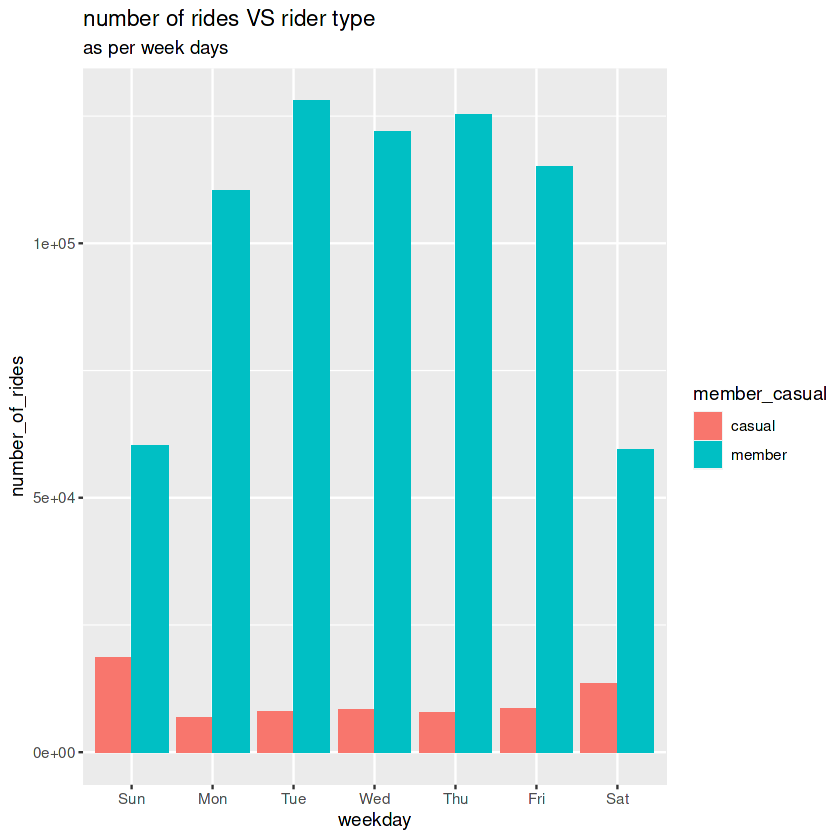

In [26]:
# visualizing the number of rides by rider type week wise
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "number of rides VS rider type",subtitle="as per week days")

In [27]:
table(all_trips$month)
# data present for only first 3 months


    01     02     03 
247156 235771 309029 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


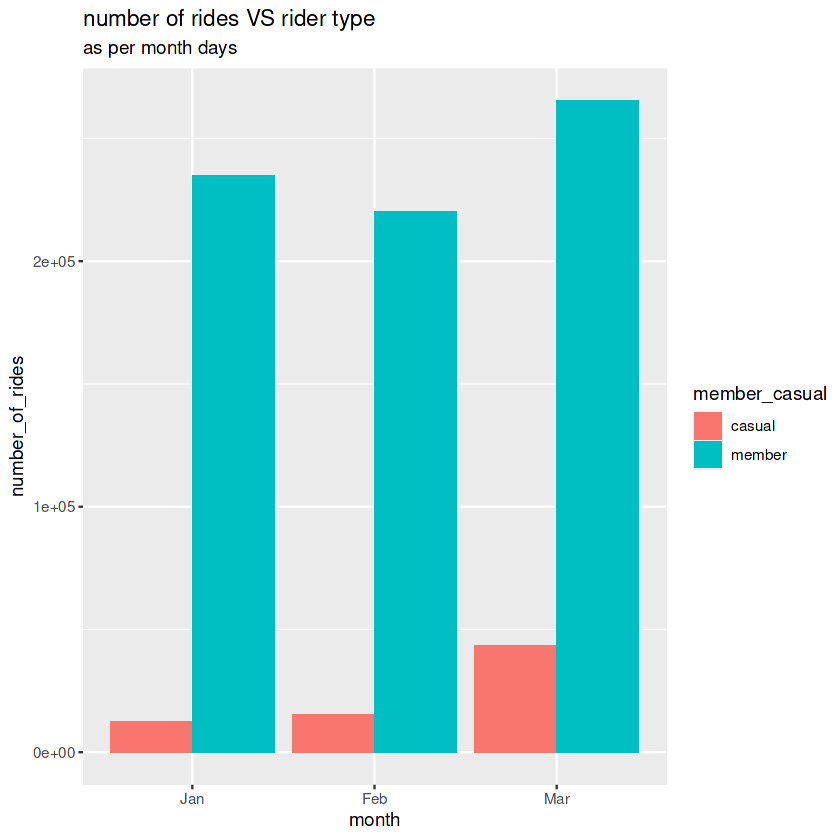

In [28]:
# visualizing the number of rides by rider type month wise
all_trips_v2 %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "number of rides VS rider type",subtitle="as per month days")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


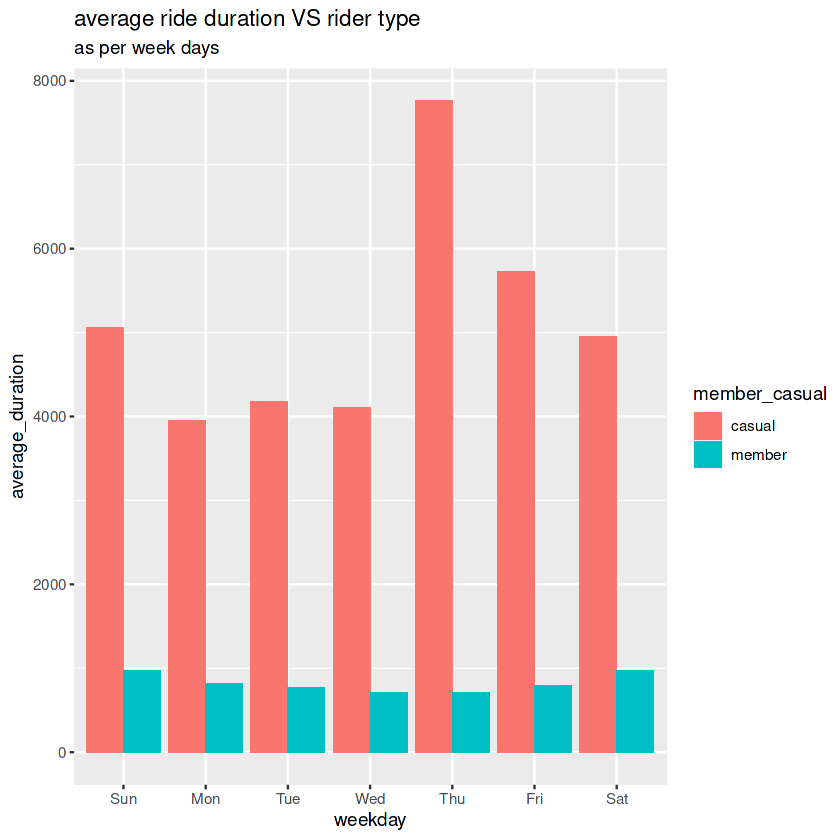

In [29]:
# visualizing for average duration by rider type week wise
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "average ride duration VS rider type", subtitle="as per week days")
  

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


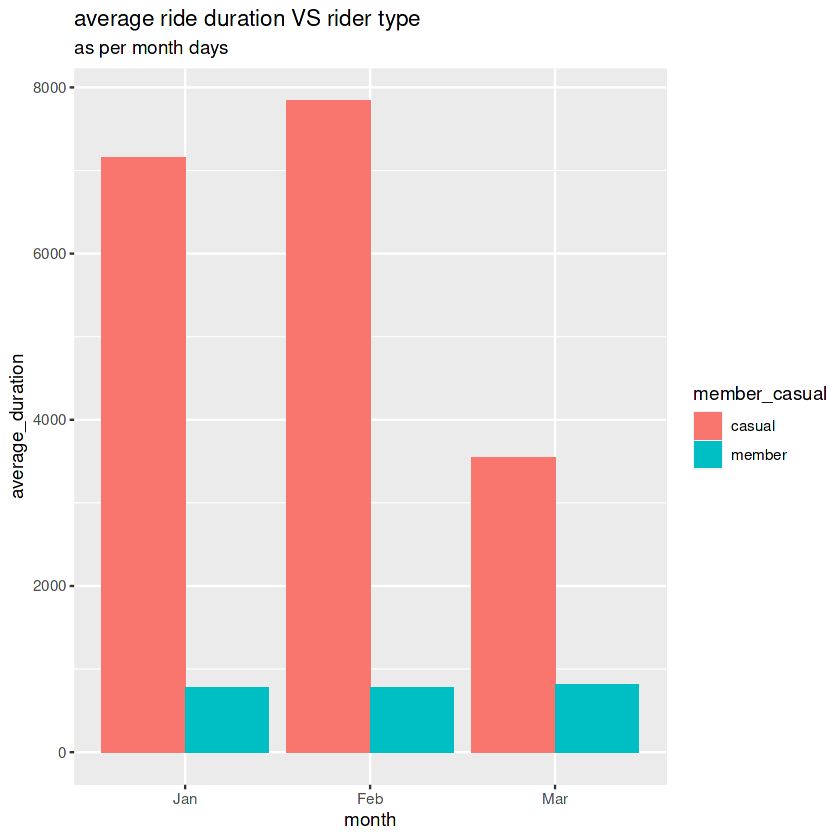

In [30]:
# visualization for average duration by rider type month wise
all_trips_v2 %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "average ride duration VS rider type", subtitle="as per month days")

STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS

In [31]:
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts , "Cyclistic-Bikeshare-case-study\\avg_ride_length.csv")

# Conclusion

* The average ride duration of casual users is more than average ride duration of members. While the average rides for members is more than casual users. 

* The number of rides taken by members decreases on weekend(Saturday, Sunday) while there is increase in number of rides take by casual users on weekend(Saturday, Sunday).

It can be inferred that casual users may be tourists or travel for leisure while members book bikes for transportation/commute.

# Recommendation

* Travel cost for single-ride passes can be increased on weekends. This will make membership pricing plans seem more feasible.
* Membership plans can include incentive like early booking options or other perks for long trip duration as casual riders tend to ride for longer duration.